# Compare Wikipedia dumps

In [38]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from matplotlib import pyplot as plt
import numpy as np

In [10]:
# path to Parquet files
DATA_PATH = "/mnt/data/wikipedia/dumps-pre-processed/"

In [17]:
# initialise sparkContext
spark = SparkSession.builder \
    .master('local') \
    .appName('myAppName') \
    .config('spark.executor.memory', '16gb') \
    .config("spark.cores.max", "*") \
    .getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [24]:
# read pages and categories into a DF
normal_pages_20190320_df = sqlContext.read.parquet(DATA_PATH + "20190320/page/normal_pages/*")
category_pages_20190320_df = sqlContext.read.parquet(DATA_PATH + "20190320/page/category_pages/*")

normal_pages_20190301_df = sqlContext.read.parquet(DATA_PATH + "20190301/page/normal_pages/*")
category_pages_20190301_df = sqlContext.read.parquet(DATA_PATH + "20190301/page/category_pages/*")

normal_pages_20180801_df = sqlContext.read.parquet(DATA_PATH + "20180801/page/normal_pages/*")
category_pages_20180801_df = sqlContext.read.parquet(DATA_PATH + "20180801/page/category_pages/*")

In [29]:
count_pages_20190320 = normal_pages_20190320_df.count()
count_categories_20190320 = category_pages_20190320_df.count()

count_pages_20190301 = normal_pages_20190301_df.count()
count_categories_20190301 = category_pages_20190301_df.count()

count_pages_20180801 = normal_pages_20180801_df.count()
count_categories_20180801 = category_pages_20180801_df.count()

In [30]:
print("Number of normal pages for 20190320: " + str(count_pages_20190320))
print("Number of category pages for 20190320: " + str(count_categories_20190320))

print("Number of normal pages for 20190301: " + str(count_pages_20190301))
print("Number of category pages for 20190301: " + str(count_categories_20190301))

print("Number of normal pages for 20180801: " + str(count_pages_20180801))
print("Number of category pages for 20180801: " + str(count_categories_20180801))

Number of normal pages for 20190320: 5828462
Number of category pages for 20190320: 1810370
Number of normal pages for 20190301: 5816996
Number of category pages for 20190301: 1803414
Number of normal pages for 20180801: 5690369
Number of category pages for 20180801: 1726005


Text(0.5, 1.0, 'Pages')

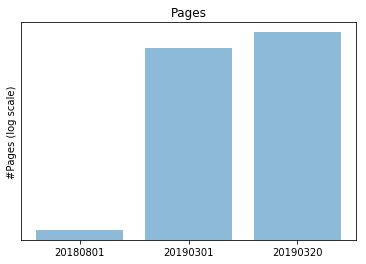

In [46]:
dates = ('20180801', '20190301', '20190320')
y_pos = np.arange(len(dates))
counts = [count_pages_20180801, count_pages_20190301, count_pages_20190320]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, dates)
plt.ylabel('#Pages (log scale)')
plt.yscale('log')
plt.title('Pages')

Text(0.5, 1.0, 'Categories')

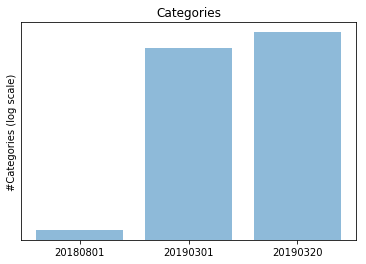

In [48]:
counts = [count_categories_20180801, count_categories_20190301, count_categories_20190320]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, dates)
plt.ylabel('#Categories (log scale)')
plt.yscale('log')
plt.title('Categories')

In [26]:
# read links into a DF

pagelinks_20190320_df = sqlContext.read.parquet(DATA_PATH + "20190320/pagelinks/*")
categorylinks_20190320_df = sqlContext.read.parquet(DATA_PATH + "20190320/categorylinks/*")

pagelinks_20190301_df = sqlContext.read.parquet(DATA_PATH + "20190301/pagelinks/*")
categorylinks_20190301_df = sqlContext.read.parquet(DATA_PATH + "20190301/categorylinks/*")

pagelinks_20180801_df = sqlContext.read.parquet(DATA_PATH + "20180801/pagelinks/*")
categorylinks_20180801_df = sqlContext.read.parquet(DATA_PATH + "20180801/categorylinks/*")

In [31]:
count_pagelinks_20190320 = pagelinks_20190320_df.count()
count_categorylinks_20190320 = categorylinks_20190320_df.count()

count_pagelinks_20190301 = pagelinks_20190301_df.count()
count_categorylinks_20190301 = categorylinks_20190301_df.count()

count_pagelinks_20180801 = pagelinks_20180801_df.count()
count_categorylinks_20180801 = categorylinks_20180801_df.count()

In [32]:
print("Number of pagelinks for 20190320: " + str(count_pagelinks_20190320))
print("Number of categorylinks for 20190320: " + str(count_categorylinks_20190320))

print("Number of pagelinks for 20190301: " + str(count_pagelinks_20190301))
print("Number of categorylinks for 20190301: " + str(count_categorylinks_20190301))

print("Number of pagelinks for 20180801: " + str(count_pagelinks_20180801))
print("Number of categorylinks for 20180801: " + str(count_categorylinks_20180801))

Number of pagelinks for 20190320: 477578102
Number of categorylinks for 20190320: 65261669
Number of pagelinks for 20190301: 475679782
Number of categorylinks for 20190301: 64774515
Number of pagelinks for 20180801: 456564006
Number of categorylinks for 20180801: 60555403


Text(0.5, 1.0, 'Pagelinks')

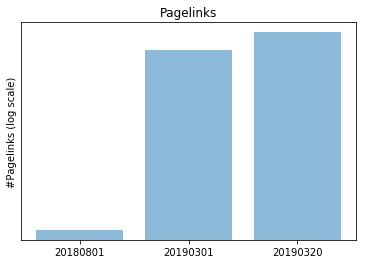

In [50]:
counts = [count_pagelinks_20180801, count_pagelinks_20190301, count_pagelinks_20190320]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, dates)
plt.ylabel('#Pagelinks (log scale)')
plt.yscale('log')
plt.title('Pagelinks')

Text(0.5, 1.0, 'Categorylinks')

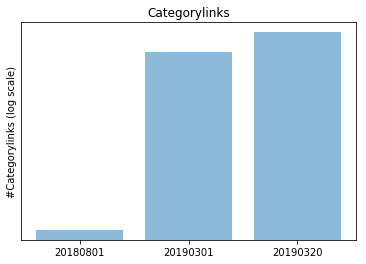

In [51]:
counts = [count_categorylinks_20180801, count_categorylinks_20190301, count_categorylinks_20190320]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, dates)
plt.ylabel('#Categorylinks (log scale)')
plt.yscale('log')
plt.title('Categorylinks')